# Investment Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

###### Load the companies and rounds data

In [2]:
companies = pd.read_csv('data/companies.txt', sep='\t', encoding='ISO-8859-1')
rounds2 = pd.read_csv('data/rounds2.csv', sep=',', encoding='ISO-8859-1')

In [3]:
companies.head(20)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [4]:
rounds2.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [5]:
# structure of the data frame, types of columns
print(companies.shape)
print(companies.info())

(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None


In [6]:
companies.isnull()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
66363,False,False,False,False,False,False,False,False,False,True
66364,False,False,False,False,False,False,False,False,False,False
66365,False,False,False,True,False,True,True,True,True,False
66366,False,False,False,False,False,False,False,False,False,False


In [7]:
# summing up the missing values (column-wise)
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
# structure of the rounds2 data frame, types of columns
print(rounds2.shape)
print(rounds2.info())

(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [9]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Table 1.1: Understand the Data Set 

#### How many unique companies are present in rounds2?

In [10]:
# Converting the columns company_permalink to lowercase to avoid duplicates
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())
rounds2.company_permalink.nunique()

66370

#### How many unique companies are present in companies?

In [11]:
# Converting the columns to lowercase to avoid duplicacy due to different case
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies.permalink.nunique()

66368

- How many unique companies are present in rounds2? = 66370
- How many unique companies are present in companies? = 66368
<br><br>Above data don't looks correct. Analyze if some cleaning needed

In [12]:
rounds2.loc[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [13]:
# Removing the special characters 
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['permalink'] = companies['permalink'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

#### How many unique companies are present in rounds2?

In [14]:
rounds2.company_permalink.nunique()

66368

#### How many unique companies are present in companies?

In [15]:
companies.permalink.nunique()

66368

- How many unique companies are present in rounds2? = 66368
- How many unique companies are present in companies? = 66368

#### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

permalink

#### Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [16]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. 

In [17]:
master_frame = pd.merge(rounds2, companies, left_on="company_permalink", right_on="permalink", how='left')

In [18]:
master_frame.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [19]:
master_frame.shape

(114949, 16)

In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [21]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [22]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [23]:
master_frame.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [24]:
master_frame[master_frame.status == 'closed']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
65,/organization/10bestthings,/funding-round/35a58e17c5f6e25658a526fe9f6f8364,seed,NaN,01-04-2009,50000.0,/organization/10bestthings,10BestThings,http://10bestthings.com,Curated Web,closed,USA,OH,Cleveland,Cleveland,01-04-2009
81,/organization/11i-solutions,/funding-round/e07501ed6997290b1bef59406bc300a1,venture,NaN,22-03-2011,1800000.0,/organization/11i-solutions,11i Solutions,http://www.11isolutions.com,Enterprise Software,closed,USA,AL,Huntsville,Huntsville,NaN
130,/organization/169-st,/funding-round/83b14cdf635963a5abc50cdafd9b462d,angel,NaN,01-06-2009,50000.0,/organization/169-st,169 ST.,http://www.junebugreview.com,Entertainment|Games,closed,USA,FL,Orlando,Lake Mary,15-05-2009
146,/organization/180solutions,/funding-round/e55f5f2b9ee65826cc5bf2e1cc2eec9e,venture,A,05-04-2004,40000000.0,/organization/180solutions,180Solutions,NaN,Advertising|Advertising Platforms|Promotional,closed,USA,WA,Seattle,Bellevue,NaN
151,/organization/1bib,/funding-round/db9507d458c110af3916ade1f6140e1a,venture,A,07-02-2008,NaN,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,closed,CHN,30,Guangzhou,Guangzhou,01-01-2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114887,/organization/zymetis,/funding-round/838709f20ce343dd3bdbc18aa5e22e19,grant,NaN,31-01-2010,1500000.0,/organization/zymetis,Zymetis,http://www.zymetis.com,Biotechnology,closed,USA,MD,"Washington, D.C.",College Park,01-01-2006
114928,/organization/zyraz-technology,/funding-round/3c3ae0f177e01a04deea811e1828be35,private_equity,NaN,15-02-2013,20967.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114929,/organization/zyraz-technology,/funding-round/55f33b179dd6f4516315348c1e8350c6,angel,NaN,01-01-2008,2007363.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114930,/organization/zyraz-technology,/funding-round/c05aab2155e390066d51c6852ff61464,grant,NaN,11-09-2009,5400000.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994


In [25]:
# dropping rows having status = closed
master_frame = master_frame[master_frame.status != 'closed']

In [26]:
master_frame[master_frame.status == 'closed']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [27]:
# there some companies whose status is nan\. should we drop those?
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.74
funded_at                   0.00
raised_amount_usd          17.25
permalink                   0.00
name                        0.00
homepage_url                5.00
category_list               2.25
status                      0.00
country_code                6.43
state_code                  8.41
region                      7.72
city                        7.71
founded_at                 16.80
dtype: float64

In [28]:
master_frame.funding_round_code.unique()

array(['B', 'A', nan, 'C', 'D', 'E', 'G', 'F', 'H'], dtype=object)

In [29]:
# droping funding_round_code column 72.74% values are null
master_frame = master_frame.drop('funding_round_code', axis=1)

In [30]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.25
permalink                   0.00
name                        0.00
homepage_url                5.00
category_list               2.25
status                      0.00
country_code                6.43
state_code                  8.41
region                      7.72
city                        7.71
founded_at                 16.80
dtype: float64

In [31]:
# dropping rows which have raised_amount_usd as null
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [32]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.82
dtype: float64

In [33]:
master_frame.country_code.unique()

array(['IND', 'USA', nan, 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'ROM', 'KOR', 'NLD', 'SWE', 'DNK', 'NOR', 'COL', 'ESP', 'BEL',
       'IRL', 'ITA', 'SGP', 'RUS', 'NZL', 'CHE', 'BRA', 'SVN', 'JOR',
       'HUN', 'JPN', 'BWA', 'DEU', 'NGA', 'ISR', 'FIN', 'CYP', 'CRI',
       'IDN', 'PRT', 'ARG', 'TWN', 'THA', 'UKR', 'LTU', 'ISL', 'MEX',
       'TUR', 'VEN', 'URY', 'AUT', 'KEN', 'ZAF', 'PHL', 'MNE', 'MYS',
       'PER', 'POL', 'EGY', 'PAN', 'GGY', 'VNM', 'UGA', 'HRV', 'EST',
       'MUS', 'LBN', 'GRC', 'NPL', 'BGR', 'SVK', 'LUX', 'CZE', 'ARE',
       'SAU', 'PAK', 'IRN', 'ALB', 'BAH', 'LVA', 'ARM', 'BGD', 'MDA',
       'GHA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC', 'TAN', 'PRI', 'TTO',
       'CMR', 'BLR', 'CYM', 'ECU', 'MLT', 'ZMB', 'GIB', 'BHR', 'TGO',
       'BMU', 'HND', 'MCO', 'MMR', 'KAZ', 'QAT', 'MAR', 'LIE', 'SLV',
       'GEO', 'DOM', 'DZA', 'GTM', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA',
       'DMA', 'UZB', 'BLZ', 'OMN', 'PSE', 'KWT', 'KHM', 'CIV', 'GRD',
       'LAO', '

In [34]:
# Removing rows having nan country code. The analysis will also be based in countries.
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [35]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [36]:
master_frame.category_list.unique()

array(['Media', 'Application Platforms|Real Time|Social Network Media',
       'Curated Web', ...,
       'Analytics|Android|Developer APIs|Education|Gamification|iOS',
       'Advertising|Mobile|Web Development|Wireless',
       'Consumer Electronics|Internet of Things|Telecommunications'],
      dtype=object)

### Funding Type Analysis

In [37]:
master_frame.raised_amount_usd = master_frame.raised_amount_usd.apply(lambda x : round(x/1000000, 3))
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.043,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [38]:
df_by_funding_round_type_mean = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
df_by_funding_round_type_mean

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903153
Name: raised_amount_usd, dtype: float64

##### Average funding amount of venture type

In [39]:
round(df_by_funding_round_type_mean['venture'], 2)

11.9

##### Average funding amount of angel type

In [40]:
round(df_by_funding_round_type_mean['angel'], 2)

0.99

##### Average funding amount of seed type

In [41]:
round(df_by_funding_round_type_mean['seed'], 2)

0.76

##### Average funding amount of private equity type

In [42]:
round(df_by_funding_round_type_mean['private_equity'], 2)

75.8

##### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [43]:
bool_series = df_by_funding_round_type_mean.between(5.0, 15.0, inclusive=True)
bool_series

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

### For further analysis use identified the investment type 

In [44]:
bool_series[bool_series].index

Index(['venture'], dtype='object', name='funding_round_type')

In [45]:
# filter dataframe with identified the investment type
filtered_master_frame = master_frame[master_frame.funding_round_type.isin(bool_series[bool_series].index)]
# filtered_master_frame = master_frame[master_frame.funding_round_type == 'venture']

In [46]:
filtered_master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,0.555,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,0.141,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8.500,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2.687,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


### Country Analysis

In [47]:
filtered_master_frame.isna().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url               1983
category_list               201
status                        0
country_code                  0
state_code                  696
region                      549
city                        549
founded_at                 7506
dtype: int64

#### For the chosen investment type, make a data frame named top9 with the top nine countries 

In [48]:
top9 = filtered_master_frame.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False).head(9)
top9


,country_code,raised_amount_usd
94,USA,399935.179
15,CHN,39101.773
29,GBR,18241.345
39,IND,14050.604
12,CAN,8825.477
28,FRA,6775.039
42,ISR,6503.020
21,DEU,6061.141
45,JPN,3242.031


In [49]:
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)
top9

,country_code,raised_amount_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


- Top English speaking country: USA
- Second English speaking country: GBR
- Third English speaking country: IND

### Sector Analysis 1

In [50]:
# read mapping.csv
mapping=pd.read_csv('data/mapping.csv')

In [51]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [53]:
mapping.dropna(inplace=True)

In [54]:
mapping.isna().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [55]:
mapping.shape

(687, 10)

In [56]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Blanks                                     687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [57]:
primary_sector = filtered_master_frame['category_list'].str.split('|',n=1,expand=True)

In [58]:
primary_sector

,0,1
0,Media,None
4,Curated Web,None
8,Biotechnology,None
10,Analytics,None
11,Analytics,None
...,...,...
114923,Biotechnology,None
114934,E-Commerce,None
114936,Biotechnology,None
114937,Biotechnology,None


In [59]:
# Filling the 'Primary_Sector' column with the extrated category values.
filtered_master_frame['primary_sector'] = primary_sector[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
filtered_master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44949 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          44949 non-null object
funding_round_permalink    44949 non-null object
funding_round_type         44949 non-null object
funded_at                  44949 non-null object
raised_amount_usd          44949 non-null float64
permalink                  44949 non-null object
name                       44949 non-null object
homepage_url               42966 non-null object
category_list              44748 non-null object
status                     44949 non-null object
country_code               44949 non-null object
state_code                 44253 non-null object
region                     44400 non-null object
city                       44400 non-null object
founded_at                 37443 non-null object
primary_sector             44748 non-null object
dtypes: float64(1), object(15)
memory usage: 5.8+ MB


In [61]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [62]:
# using pd.melt
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html
melted_df = pd.melt(mapping, id_vars=['category_list'],
                    value_vars=[
                        'Automotive & Sports', 'Blanks','Cleantech / Semiconductors', 'Entertainment', 
                        'Health','Manufacturing', 'News, Search and Messaging', 'Others', 
                        'Social, Finance, Analytics, Advertising'
                    ])

In [63]:
melted_df.head(20)

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [64]:
# We need only those rows which have value = 1 
melted_df=melted_df[melted_df.value==1]

In [65]:
melted_df

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [66]:
# rename column names
melted_df = melted_df.rename(columns={'category_list':'primary_sector', 'variable':'main_sector'})

In [67]:
melted_df = melted_df.drop('value', axis=1)

In [68]:
melted_df

,primary_sector,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [69]:
merged_df = pd.merge(filtered_master_frame, melted_df, on='primary_sector', how='inner')

In [70]:
merged_df.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.000,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,0.650,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,0.750,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
7,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1.582,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
8,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2.000,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1.250,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment


### Sector Analysis 2

In [71]:
# the range of funding preferred by Spark Funds is 5 to 15 million USD. So filtering df
merged_df_FT = merged_df[merged_df['raised_amount_usd'].between(5.0, 15.0, inclusive=True)]

In [72]:
merged_df_FT.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.8,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment


##### Create three separate data frames D1, D2 and D3

In [73]:
D1 = merged_df_FT[merged_df_FT['country_code'] == 'USA']
D2 = merged_df_FT[merged_df_FT['country_code'] == 'GBR']
D3 = merged_df_FT[merged_df_FT['country_code'] == 'IND']

In [74]:
# add total number (or count) of investments for each main sector in a separate column
D1 = D1.assign(total_number_of_investments = D1.groupby('main_sector')['main_sector'].transform('count'))
# add total amount invested in each main sector in a separate column
D1 = D1.assign(total_amount_invested = D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number_of_investments,total_amount_invested
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,520,4503.764
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5.00,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,520,4503.764
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,520,4503.764
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,520,4503.764
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5.00,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,520,4503.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41739,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,5.00,/organization/thredhq,Thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",1817,15935.719
41744,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,03-08-2015,8.00,/organization/wizrocket-technologies,CleverTap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,24-05-2013,Consumer Behavior,"Social, Finance, Analytics, Advertising",1817,15935.719
41749,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,8.25,/organization/user-interface,User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,User Interface,Others,2739,24469.473
41751,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,10.50,/organization/washio,Washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Service Industries,Others,2739,24469.473


In [75]:
# add total number (or count) of investments for each main sector in a separate column
D2 = D2.assign(total_number_of_investments = D2.groupby('main_sector')['main_sector'].transform('count'))
# add total amount invested in each main sector in a separate column
D2 = D2.assign(total_amount_invested = D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))
D2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number_of_investments,total_amount_invested
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,51,442.242
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,51,442.242
119,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,11-03-2014,10.000,/organization/azimo,Azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,29-10-2012,Curated Web,"News, Search and Messaging",66,558.500
130,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,13-05-2014,7.000,/organization/basekit-platform,BaseKit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
131,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,03-02-2014,6.819,/organization/basekit-platform,BaseKit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41523,/organization/lost-my-name,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,25-06-2015,9.000,/organization/lost-my-name,Lost My Name,http://www.lostmy.name/,Kids|Publishing,operating,GBR,H9,London,London,01-01-2012,Kids,Others,138,1204.441
41539,/organization/perpetuum,/funding-round/e26492fb6eddf9086f93362265460739,venture,12-10-2007,10.182,/organization/perpetuum,Perpetuum,http://www.perpetuum.com/,Wireless,operating,GBR,M4,London,Southampton,01-01-2004,Wireless,Entertainment,51,442.242
41711,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,15-04-2015,10.000,/organization/yoyo,Yoyo Wallet,http://www.yoyowallet.com,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,H9,London,London,01-05-2013,Loyalty Programs,Others,138,1204.441
41731,/organization/stingray-geophysical,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,23-03-2006,11.460,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,Gas|Oil|Services,operating,GBR,N7,London,Guildford,NaN,Gas,Cleantech / Semiconductors,114,1028.027


In [76]:
# add total number (or count) of investments for each main sector in a separate column
D3 = D3.assign(total_number_of_investments = D3.groupby('main_sector')['main_sector'].transform('count'))
# add total amount invested in each main sector in a separate column
D3 = D3.assign(total_amount_invested = D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))
D3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number_of_investments,total_amount_invested
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,32,272.080
121,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10.00,/organization/babajob,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging",49,408.835
143,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11.75,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging",49,408.835
165,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5.00,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
167,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10.00,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41275,/organization/easylink,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,13-04-2006,5.40,/organization/easylink,EasyLink,http://www.xlweb.com,Web Design|Web Development|Web Hosting,ipo,IND,25,Chennai,Chennai,14-04-1995,Web Design,"News, Search and Messaging",49,408.835
41295,/organization/livspace,/funding-round/8c6fdd230ae9e06797e722d678f47474,venture,11-08-2015,8.00,/organization/livspace,Livspace,http://www.livspace.com/,Interior Design,operating,IND,19,Bangalore,Bangalore,01-01-2012,Interior Design,Entertainment,32,272.080
41341,/organization/razorpay,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,27-10-2015,9.00,/organization/razorpay,Razorpay,https://razorpay.com/,FinTech|Payments,operating,IND,19,Bangalore,Bangalore,01-01-2013,FinTech,"Social, Finance, Analytics, Advertising",32,290.543
41445,/organization/holidayiq-com,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,20-07-2015,15.00,/organization/holidayiq-com,HolidayIQ,http://www.holidayiq.com,Resorts|Surveys|Travel,operating,IND,19,Bangalore,Bangalore,01-01-2004,Resorts,Entertainment,32,272.080


##### Total number of Investments (count) Country 1

In [77]:
D1.shape[0]

10433

##### Total number of Investments (count) Country 2

In [78]:
D2.shape[0]

543

##### Total number of Investments (count) Country 3

In [79]:
D3.shape[0]

287

##### Total amount of investment (USD) Country 1

In [80]:
D1.raised_amount_usd.sum()

93421.242

##### Total amount of investment (USD) Country 2

In [81]:
D2.raised_amount_usd.sum()

4743.73

##### Total amount of investment (USD) Country 3

In [82]:
D3.raised_amount_usd.sum()

2569.668

##### Top Sector name (no. of investment-wise) country 1

In [83]:
top_sector_D1 = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
top_sector_D1.head(3)

main_sector
Others                                     2739
Cleantech / Semiconductors                 2150
Social, Finance, Analytics, Advertising    1817
Name: main_sector, dtype: int64

##### Top Sector name (no. of investment-wise) country 2

In [84]:
top_sector_D2 = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
top_sector_D2.head(3)

main_sector
Others                                     138
Cleantech / Semiconductors                 114
Social, Finance, Analytics, Advertising     95
Name: main_sector, dtype: int64

##### Top Sector name (no. of investment-wise) country 3

In [85]:
top_sector_D3 = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
top_sector_D3.head(3)

main_sector
Others                                     102
News, Search and Messaging                  49
Social, Finance, Analytics, Advertising     32
Name: main_sector, dtype: int64

##### For point 3 (top sector count-wise), which company received the highest investment?

In [86]:

D1[D1.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]


'PMW Technologies'

In [87]:
D2[D2.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]


'Notonthehighstreet'

In [88]:
D3[D3.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]


'ItzCash Card Ltd.'

##### For point 4 (second best sector count-wise), which company received the highest investment?

In [89]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]


'Sunverge Energy, Inc'

In [90]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Elixent'

In [91]:
D3[D3.main_sector == 'News, Search and Messaging'].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]


'Mobile2Win India'

### Plots

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903153
Name: raised_amount_usd, dtype: float64

In [104]:
sum_series = master_frame.groupby('funding_round_type')['raised_amount_usd'].sum()

In [105]:
sum_series.index

Index(['angel', 'convertible_note', 'debt_financing', 'equity_crowdfunding',
       'grant', 'non_equity_assistance', 'post_ipo_debt', 'post_ipo_equity',
       'private_equity', 'product_crowdfunding', 'secondary_market', 'seed',
       'undisclosed', 'venture'],
      dtype='object', name='funding_round_type')

#### A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

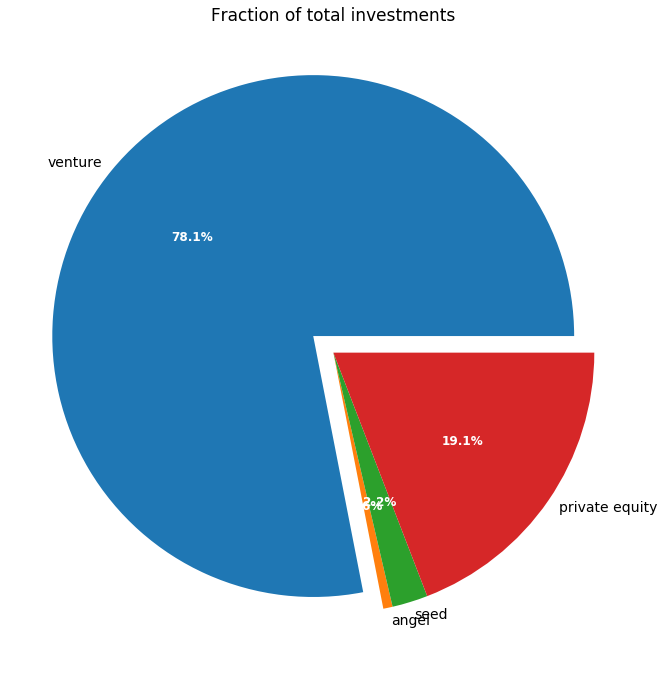

In [145]:
labels = 'venture', 'angel', 'seed', 'private equity'
sizes = [sum_series['venture'], sum_series['angel'],  sum_series['seed'], sum_series['private_equity']]
explode = (0.1, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=[12, 12])
ax = fig.add_subplot(111)
_, texts, autopcts = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', labeldistance=1.05, textprops={'fontsize': 14})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12})
ax.set_title("Fraction of total investments", fontdict={'fontsize': 17});
plt.show()

In [129]:
mean_series = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

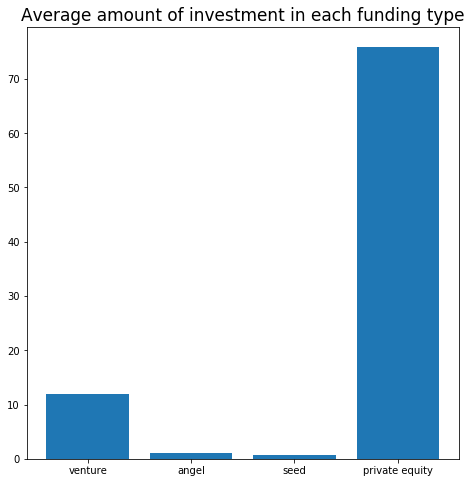

In [156]:
fig = plt.figure(figsize=[6, 6])
ax = fig.add_axes([0,0,1,1])
labels = 'venture', 'angel', 'seed', 'private equity'
mean_ft = [mean_series['venture'], mean_series['angel'],  mean_series['seed'], mean_series['private_equity']]
ax.bar(labels,mean_ft)
ax.set_title("Average amount of investment in each funding type", fontdict={'fontsize': 17});
plt.show()


### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

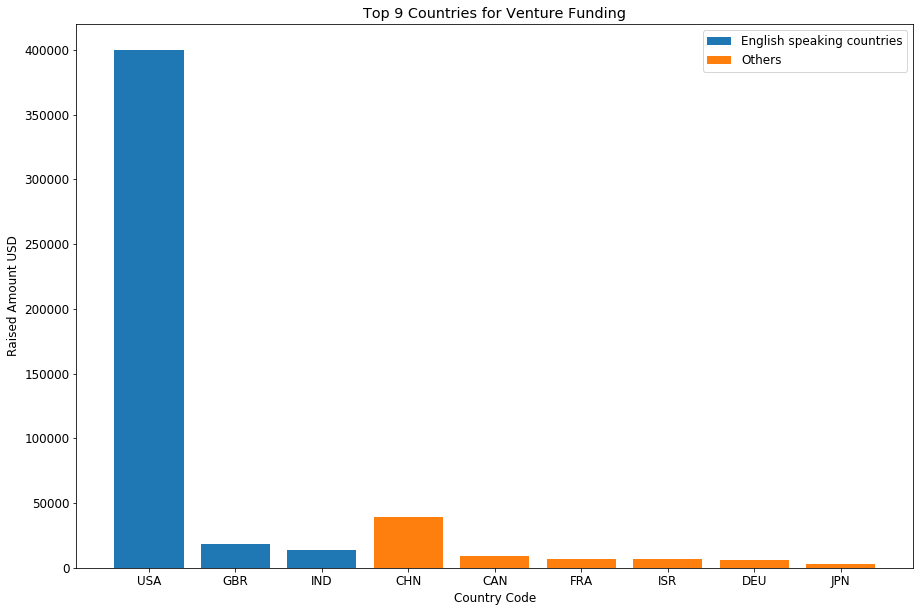

In [186]:
label = top9['country_code'].tolist() 

amunt_raised = top9['raised_amount_usd'].tolist() 

x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(label)):
    if label[i] in ['USA', 'GBR', 'IND']:
        x1.append(label[i])
        y1.append(amunt_raised[i])
    else:
        x2.append(label[i])
        y2.append(amunt_raised[i])



plt.bar(x1,y1, label="English speaking countries")

plt.bar(x2,y2, label="Others")

plt.title('Top 9 Countries for Venture Funding')

plt.xlabel('Country Code')

plt.ylabel('Raised Amount USD')

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 12})

plt.legend()

plt.show()



### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [190]:
D = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [191]:
D = D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
             

In [192]:
D = D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)                 

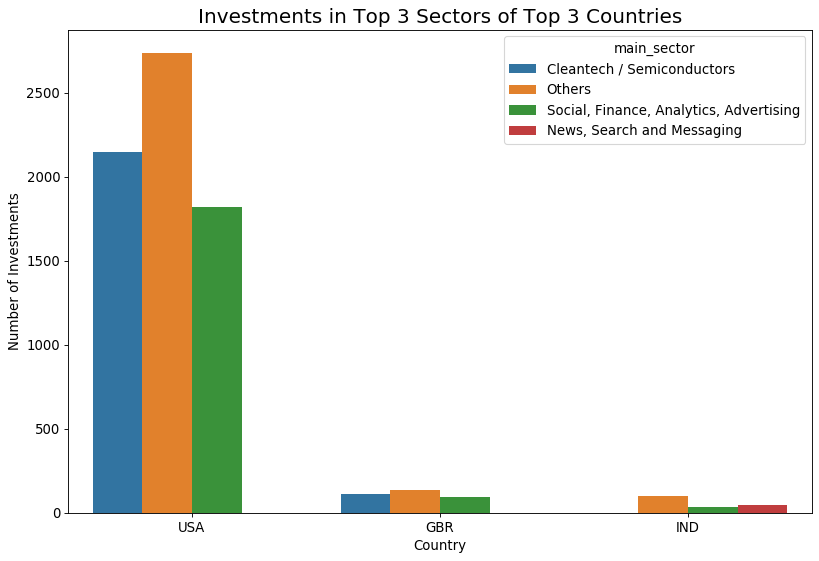

In [195]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in Top 3 Sectors of Top 3 Countries',fontsize =18)
plt.show()